# 7 Modeling for subway network topology

In [1]:
import warnings
warnings.filterwarnings('ignore')

The following example shows how to use TransBigData to download subway lines and to build a topological network model for the subway line network

## Download subway lines

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import transbigdata as tbd
line,stop = tbd.getbusdata('厦门',['1号线','2号线','3号线'])

Obtaining city id: 厦门success
1号线
地铁1号线(镇海路-岩内) success
地铁1号线(岩内-镇海路) success
2号线
地铁2号线(五缘湾-天竺山) success
地铁2号线(天竺山-五缘湾) success
3号线
地铁3号线(厦门火车站-蔡厝) success
地铁3号线(蔡厝-厦门火车站) success
地铁3号线南延段(厦门火车站-沙坡尾) success
地铁3号线南延段(沙坡尾-厦门火车站) success


<AxesSubplot:>

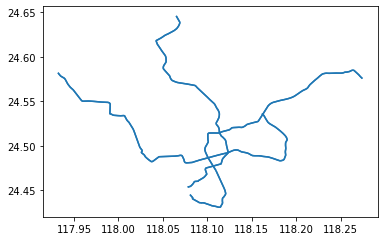

In [3]:
line.plot()

<AxesSubplot:>

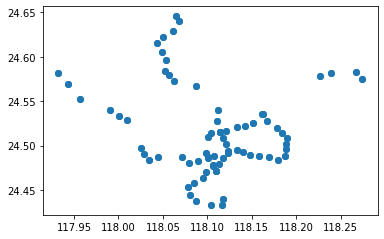

In [4]:
stop.plot()

## Splitting the metro line into sections

The `tbd.split_subwayline` method can be used to slice the metro line with metro stations to obtain metro section information (This step is useful in subway passenger flow visualization)

<AxesSubplot:>

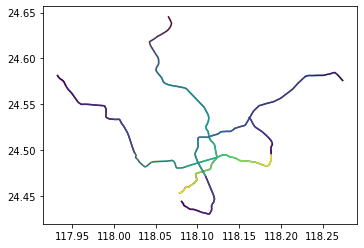

In [5]:
metroline_splited = tbd.split_subwayline(line,stop)
metroline_splited.plot(column = pd.Series(metroline_splited.index))

## Modeling for subway network topology

We can also use the metro station data to build a topology model of the metro network. This step is useful for subsequent identification of metro travel paths. The graph generated relies on NetworkX.

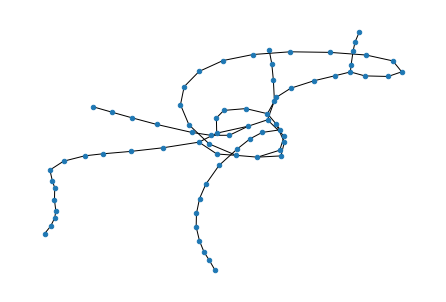

In [6]:
#Modeling for subway network topology
line['speed'] = 55 #operation speed 55km/h
line['stoptime'] = 0.5 #stop time at each stations 30s
import networkx as nx
G = tbd.metro_network(line,stop, transfertime=5)
nx.draw(G,node_size=20)

In [7]:
path = tbd.get_shortest_path(G,stop,'镇海路','蔡厝')
path

['地铁1号线镇海路',
 '地铁1号线中山公园',
 '地铁1号线将军祠',
 '地铁1号线文灶',
 '地铁1号线湖滨东路',
 '地铁3号线湖滨东路',
 '地铁3号线体育中心',
 '地铁3号线人才中心',
 '地铁3号线湖里公园',
 '地铁3号线华荣路',
 '地铁3号线火炬园',
 '地铁3号线小东山',
 '地铁3号线安兜',
 '地铁3号线坂尚',
 '地铁3号线湖里创新园',
 '地铁3号线五缘湾',
 '地铁3号线林前',
 '地铁3号线鼓锣',
 '地铁3号线后村',
 '地铁3号线蔡厝']

In [8]:
tbd.get_path_traveltime(G,path)

49.34680872200037

In [9]:
# k th shortest paths
paths =  tbd.get_k_shortest_paths(G,stop,'镇海路','蔡厝',2)
paths

[['地铁1号线镇海路',
  '地铁1号线中山公园',
  '地铁1号线将军祠',
  '地铁1号线文灶',
  '地铁1号线湖滨东路',
  '地铁3号线湖滨东路',
  '地铁3号线体育中心',
  '地铁3号线人才中心',
  '地铁3号线湖里公园',
  '地铁3号线华荣路',
  '地铁3号线火炬园',
  '地铁3号线小东山',
  '地铁3号线安兜',
  '地铁3号线坂尚',
  '地铁3号线湖里创新园',
  '地铁3号线五缘湾',
  '地铁3号线林前',
  '地铁3号线鼓锣',
  '地铁3号线后村',
  '地铁3号线蔡厝'],
 ['地铁1号线镇海路',
  '地铁1号线中山公园',
  '地铁1号线将军祠',
  '地铁1号线文灶',
  '地铁1号线湖滨东路',
  '地铁1号线莲坂',
  '地铁1号线莲花路口',
  '地铁1号线吕厝',
  '地铁1号线乌石浦',
  '地铁1号线塘边',
  '地铁1号线火炬园',
  '地铁3号线火炬园',
  '地铁3号线小东山',
  '地铁3号线安兜',
  '地铁3号线坂尚',
  '地铁3号线湖里创新园',
  '地铁3号线五缘湾',
  '地铁3号线林前',
  '地铁3号线鼓锣',
  '地铁3号线后村',
  '地铁3号线蔡厝']]

In [10]:
tbd.get_path_traveltime(G,paths[1])

49.633890662025024